# **Online Food Dataset Analysis**

# **Abstract**

This dataset gathers data from an online food ordering platform over a specific period. It includes a range of attributes related to demographics, occupation, family size, feedback, and more.

Attributes:

**Demographic Information:**
- **Age:** The customer's age.
- **Gender:** The customer's gender.
- **Marital Status:** The customer's marital status.
- **Occupation:** The customer's occupation.
- **Monthly Income:** The customer's monthly income.
- **Educational Qualifications:** The customer's educational level.
- **Family Size:** The number of people in the customer's family.

**Location Information:**
- **Latitude:** The latitude of the customer's location.
- **Longitude:** The longitude of the customer's location.
- **Pin Code:** The postal code of the customer's location.

**Order Details:**
- **Order Status:** The current status of the order (e.g., pending, confirmed, delivered).
- **Feedback:** Customer feedback provided post-delivery.

**Purpose:**
This dataset is useful for examining how demographic and location factors influence online food ordering behaviors, analyzing customer feedback to enhance service quality, and potentially forecasting customer preferences and behaviors based on their demographic and geographical data.

In [37]:
!pip install pandas

In [38]:
!pip install opendatasets

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import opendatasets as od
import os

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')

In [40]:
# df  = pd.read_csv("https://www.kaggle.com/datasets/sudarshan24byte/online-food-dataset/data")

df = "https://www.kaggle.com/datasets/sohnir/onlinefoods-csv"
od.download(df)

data_dir = './onlinefoods-csv'
os.listdir(data_dir)




Skipping, found downloaded files in "./onlinefoods-csv" (use force=True to force download)


['onlinefoods.csv']

In [41]:
!wget https://www.kaggle.com/aungpyaeap/online-food-ordering-dataset/download

--2024-04-25 21:23:38--  https://www.kaggle.com/aungpyaeap/online-food-ordering-dataset/download
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-04-25 21:23:38 ERROR 404: Not Found.



In [42]:
df = pd.read_csv('./online-food-dataset/onlinefoods.csv')

In [43]:
df.head()


,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [45]:
df.shape

(388, 13)

In [46]:
for i in df.columns:
    print(i,df[i].unique())
    print(i,df[i].nunique())
    print('-----------------------------------')

Age [20 24 22 27 23 21 28 25 32 30 31 26 18 19 33 29]
Age 16
-----------------------------------
Gender ['Female' 'Male']
Gender 2
-----------------------------------
Marital Status ['Single' 'Married' 'Prefer not to say']
Marital Status 3
-----------------------------------
Occupation ['Student' 'Employee' 'Self Employeed' 'House wife']
Occupation 4
-----------------------------------
Monthly Income ['No Income' 'Below Rs.10000' 'More than 50000' '10001 to 25000'
 '25001 to 50000']
Monthly Income 5
-----------------------------------
Educational Qualifications ['Post Graduate' 'Graduate' 'Ph.D' 'Uneducated' 'School']
Educational Qualifications 5
-----------------------------------
Family size [4 3 6 2 5 1]
Family size 6
-----------------------------------
latitude [12.9766 12.977  12.9551 12.9473 12.985  12.9299 12.9828 12.9854 12.8988
 12.9438 12.8893 12.9783 12.982  13.0298 12.9983 12.9925 12.9306 12.9353
 12.9155 13.0019 12.9698 12.9261 12.9119 12.9662 12.9565 13.0206 12.9635
 13.0

The dataset from an online food ordering platform provides a diverse array of demographic and location-based information for customers. Key observations include:

- **Age** ranges from 18 to 33 years, showing a predominantly young customer base.
- **Gender**, **Marital Status**, and **Occupation** reflect a varied demographic with basic categories representing different stages of personal and professional life.
- **Monthly Income** and **Educational Qualifications** offer five distinct categories each, indicating a wide range of economic and educational backgrounds.
- **Family Size** varies from 1 to 6, suggesting diverse household compositions.
- Geographical data, represented by **Latitude**, **Longitude**, and **Pin Code**, is quite detailed with 77 unique values each, indicating precise customer locations.
- **Order Status** and **Feedback** are binary (Yes/No and Positive/Negative, respectively), simplifying the analysis of order fulfillment and customer satisfaction.

Overall, the dataset is robust, covering comprehensive demographic and locational details that can be used to analyze customer behavior and preferences in online food ordering.

In [47]:
df.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


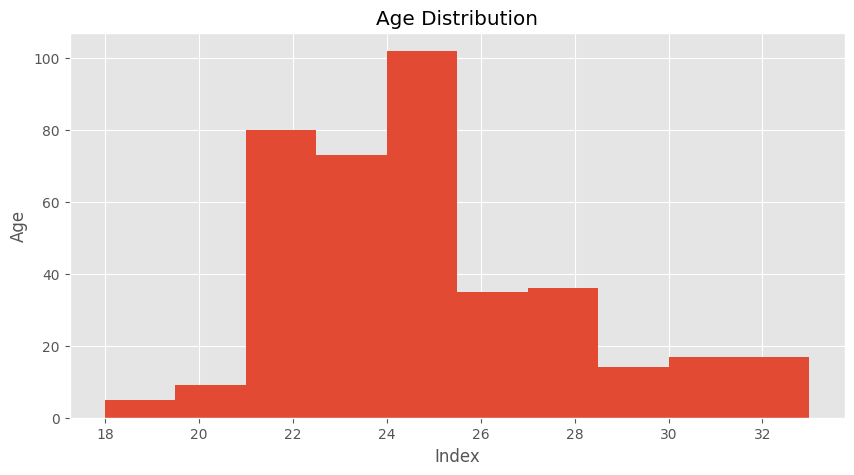

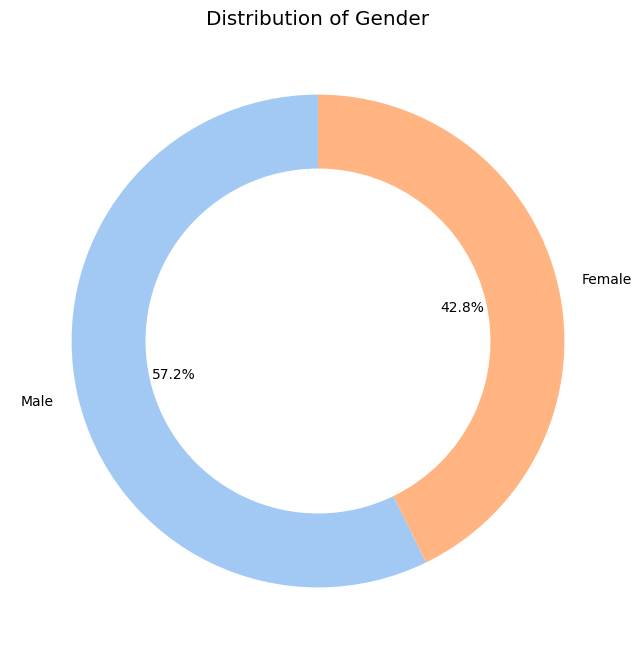

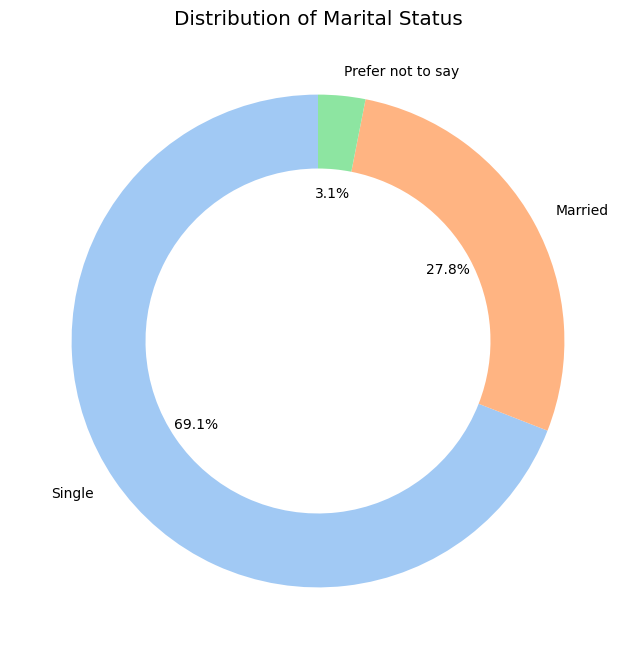

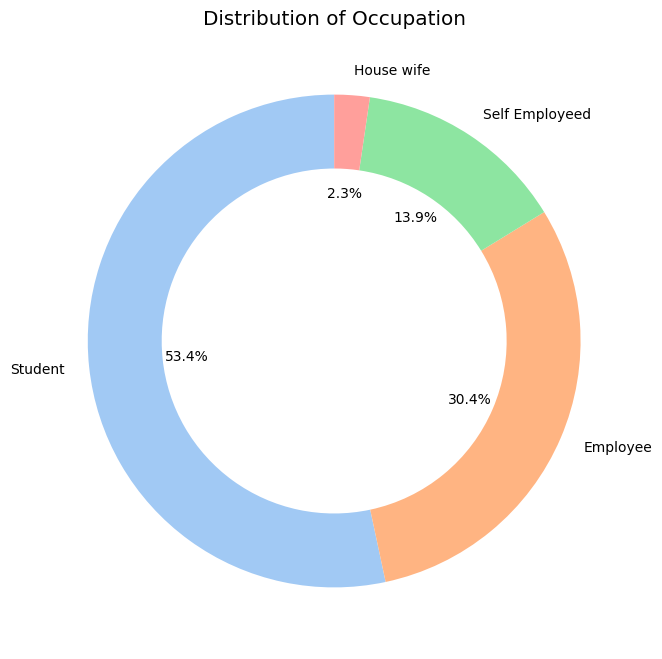

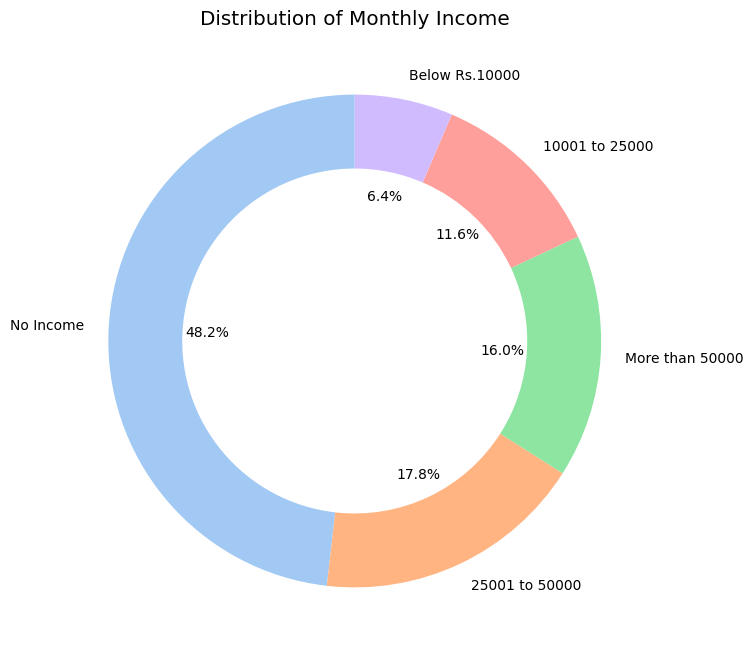

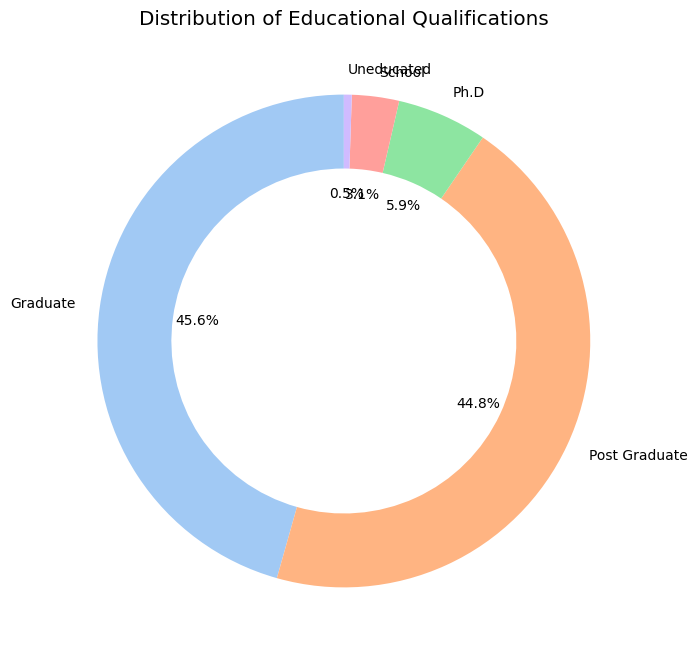

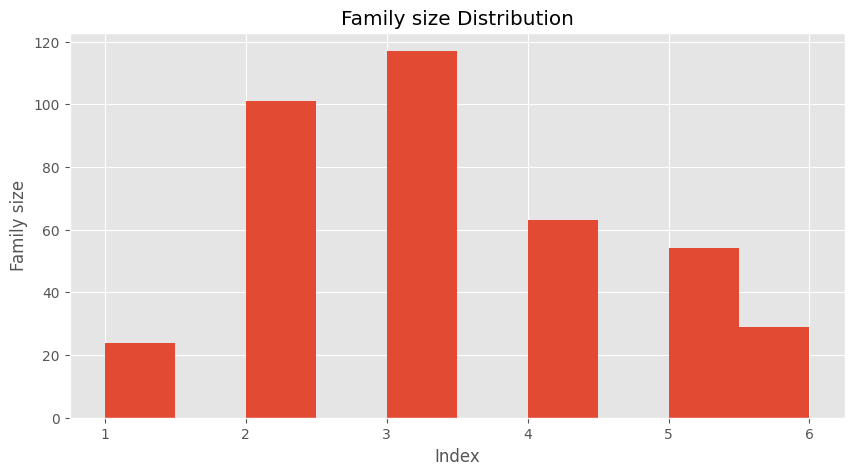

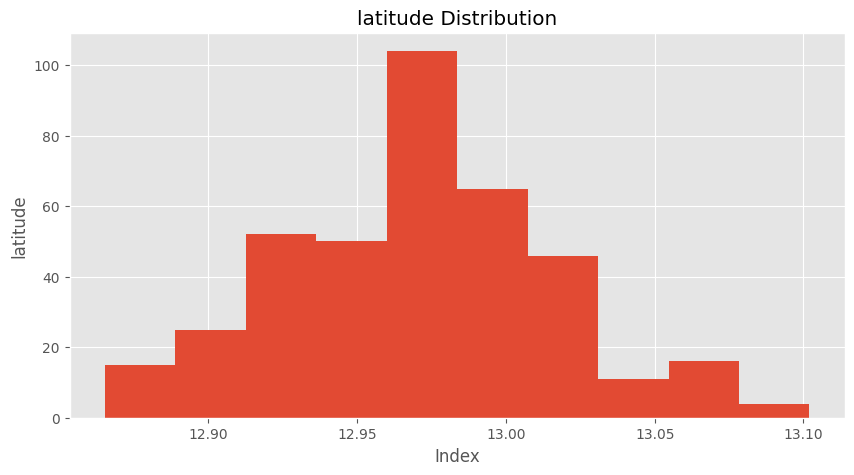

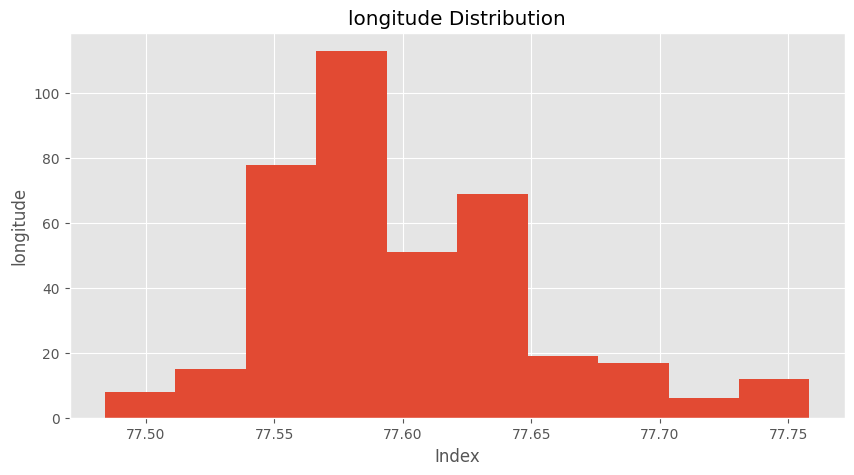

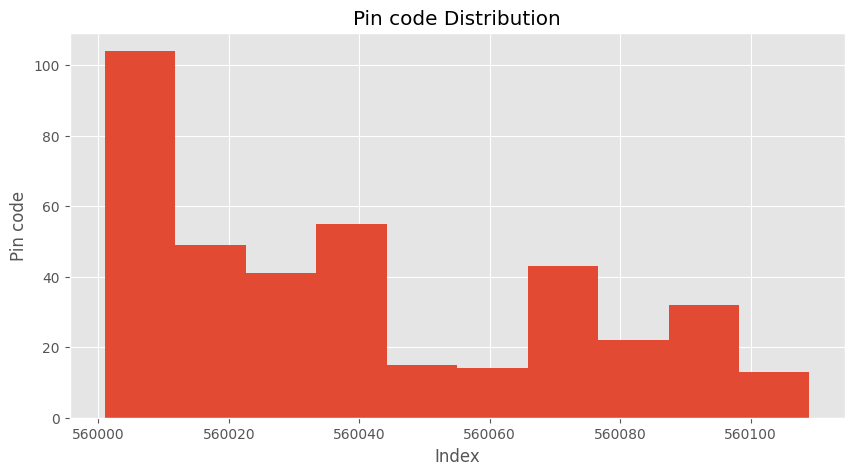

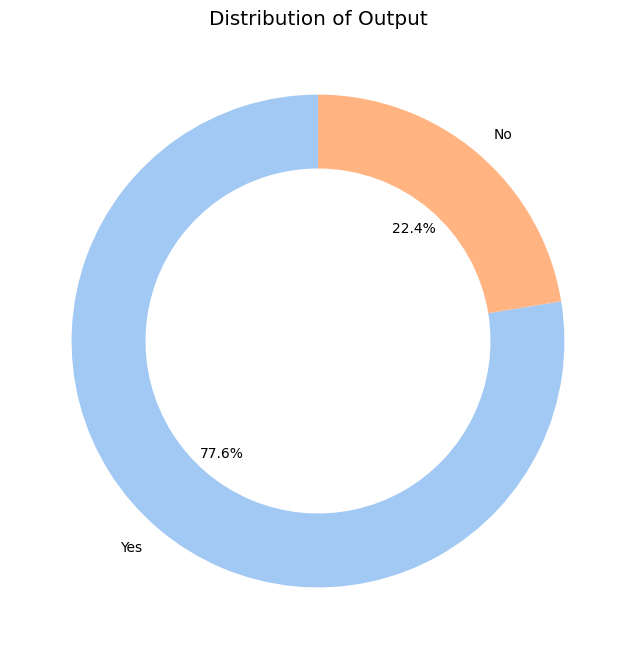

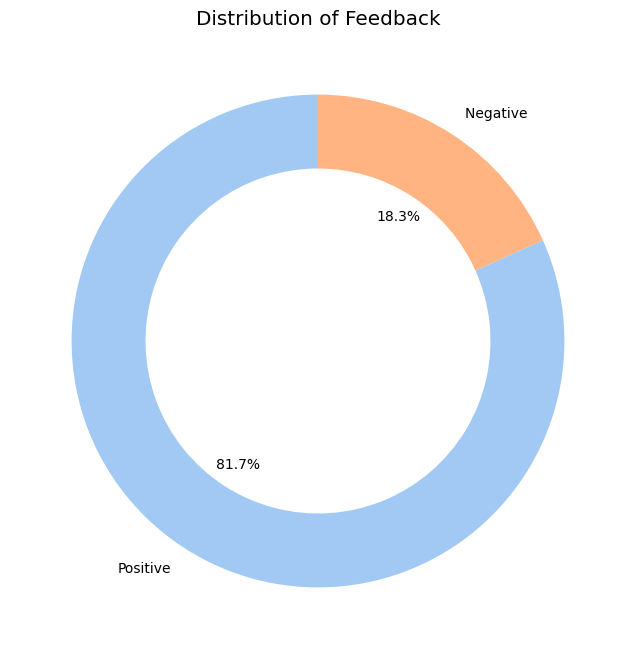

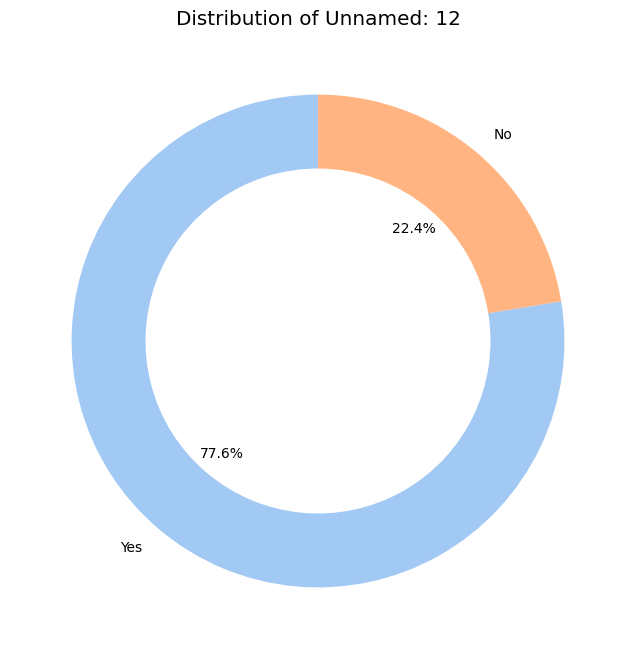

In [48]:
# Function to plot pie chart
def plot_pie_chart(column):
    plt.figure(figsize=(8, 8))
    df[column].value_counts().head(10).plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'), wedgeprops=dict(width=0.3))
    plt.title(f'Distribution of {column}')
    plt.ylabel('')
    plt.show()


def plot_hist_chart(column):
    plt.figure(figsize=(10, 5))
    df[column].hist()
    plt.title(f'{column} Distribution')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.show()

# Plotting for each column
for col in df.columns:
    if df[col].dtype == 'object':
        plot_pie_chart(col)
    else:
        plot_hist_chart(col)

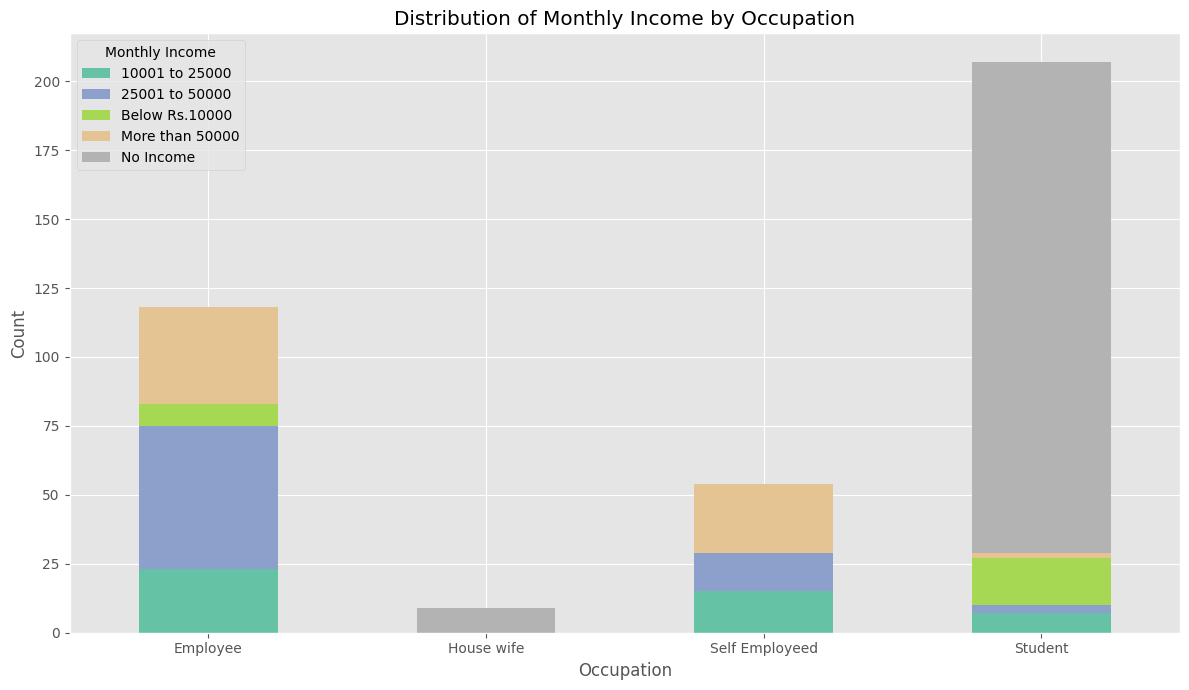

In [49]:
grouped = df.groupby(['Occupation', 'Monthly Income']).size().unstack(fill_value=0)

# Plotting
grouped.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='Set2')

plt.title('Distribution of Monthly Income by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Monthly Income')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

Here are the potential observations one might draw from the graph:

* Students predominantly fall into the 'No Income' category, which is expected as they may not be working or only working part-time.

* Employees have a spread across different income categories, with the majority earning between '10001 to 25000' and '25001 to 50000'.

* Self-Employed individuals show a varied distribution of income, with a presence in all categories except 'No Income'.

* Housewives are mainly represented in the 'No Income' category, which could be reflective of them not being engaged in paid employment.

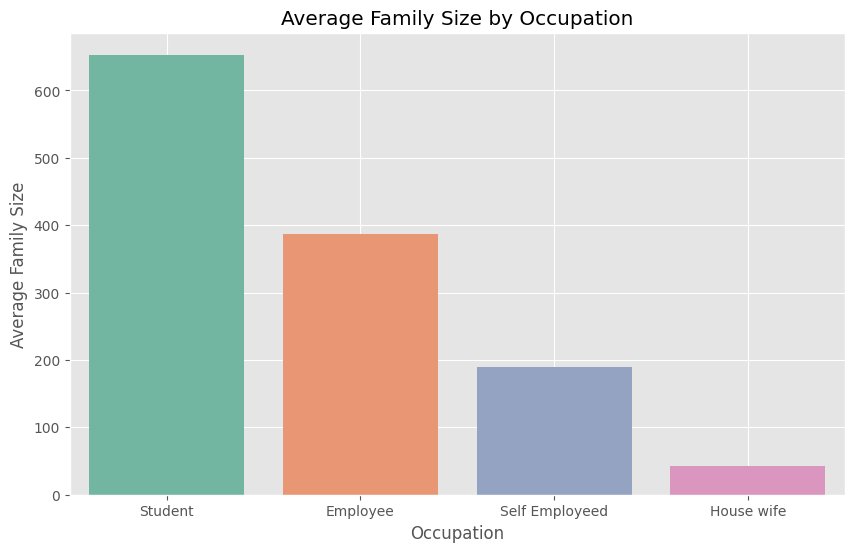

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Occupation', y='Family size', data=df, estimator=sum, ci=None, palette='Set2')
plt.title('Average Family Size by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Family Size')
plt.grid(True)
plt.show()

Here's an interpretation of the likely observations from such a graph:

* Students may have the highest average family size, which might suggest that the data includes family members living at their home of origin rather than on their own.

* Employees have a lower average family size compared to students, possibly indicating individuals who have started their own families or live independently.

* Self-Employed individuals have an even smaller average family size, which could point to a variety of personal or socio-economic factors.

* Housewives show the smallest average family size, potentially indicating that this data might represent nuclear families.

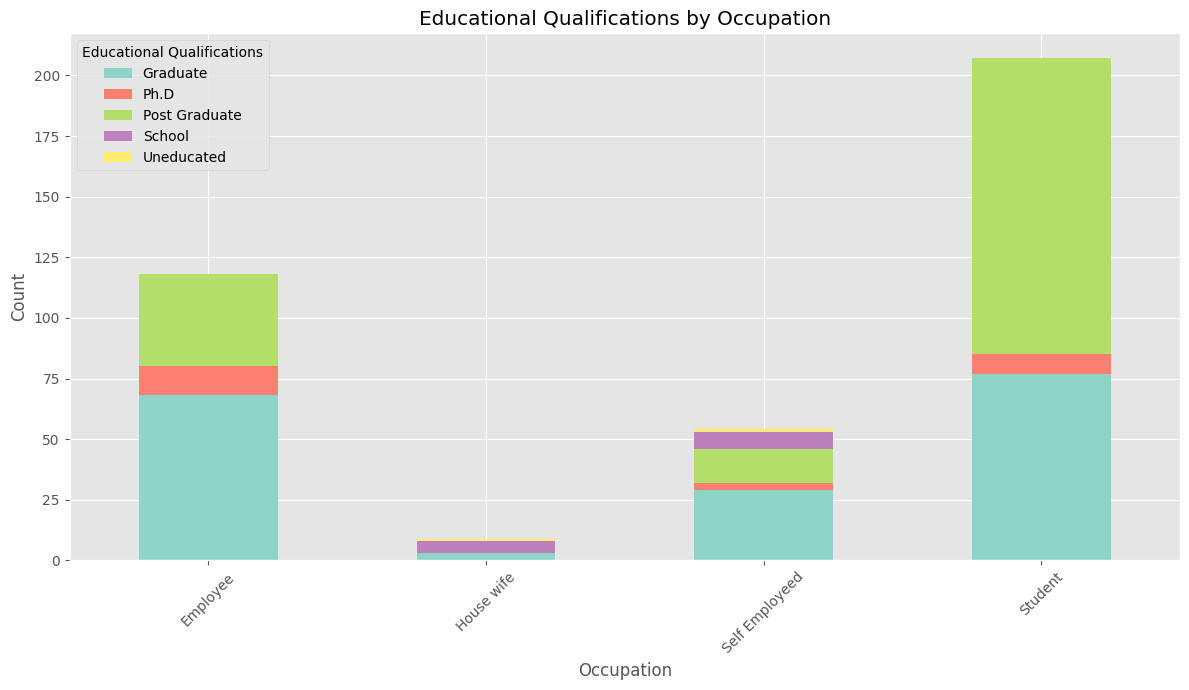

In [51]:
occupation_education = df.groupby(['Occupation', 'Educational Qualifications']).size().unstack(fill_value=0)
occupation_education.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='Set3')
plt.title('Educational Qualifications by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Educational Qualifications')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

The observations from such a graph might include:

* Students have the highest count among the educational qualifications, likely including a mix of those at the school, graduate, and postgraduate levels, but with a substantial proportion still in school, given the occupation.

* Employees show a diversity in educational qualifications, with a notable number of graduates, followed by postgraduates and a smaller segment of Ph.D. holders.

* Self-Employed individuals display a varied educational background as well, but the count across different levels of education seems more evenly spread than in the employee category.

* Housewives appear to have the least variation in educational qualifications in the dataset, with a small representation across the different educational categories.

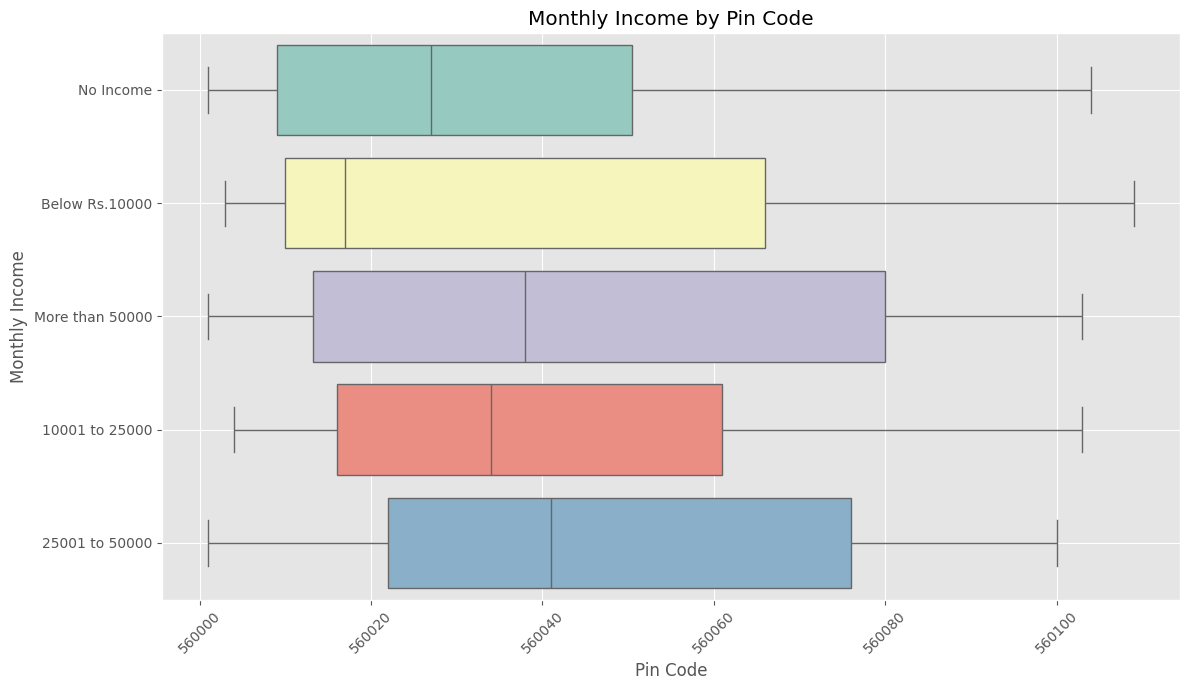

In [52]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pin code', y='Monthly Income', data=df, palette='Set3')
plt.title('Monthly Income by Pin Code')
plt.xlabel('Pin Code')
plt.ylabel('Monthly Income')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


The graph is likely to show the distribution of monthly income across different pin codes. Here are the inferred observations based on your description:

* The spread of monthly income varies by pin code, suggesting a potential correlation between geographical areas and income levels.

* Some pin codes might have a wider range of incomes, indicated by larger boxes, which means there's more variability in the incomes of residents in those areas.

* Other pin codes may show more uniformity in income, with smaller boxes.
The presence of whiskers extending from the boxes suggests there are income outliers within certain pin codes, which could be either significantly higher or lower than the median income in that area.

* The median income within each pin code can be identified by the line within each box. Some areas might have higher median incomes compared to others.

# **Conclusion**

Based on the descriptions and the provided code for the various visualizations, we can conclude the following about the dataset from an online food ordering platform:

1. **Demographics and Occupation:** There is a diverse customer base in terms of age, gender, marital status, occupation, educational qualifications, and family size. Students make up a large portion of the platform's user base, with a significant representation from employed individuals as well. There are observable patterns linking occupation types to levels of education and income.

2. **Income Analysis:** Monthly income levels show considerable variation within and across different occupations and pin codes. Employees and self-employed individuals span a range of income categories, while students predominantly fall into the 'No Income' group.

3. **Geographical Distribution:** The data reflects a geographical distribution of income, as seen in the variations across different pin codes. This implies economic diversity across the regions represented in the dataset.

4. **Educational Backgrounds:** Educational qualifications are well-represented across all occupation types, with students naturally showing a concentration in lower education levels and individuals in other occupations showing a mix of graduate and postgraduate levels.

5. **Family Size:** Family size tends to be larger among students, which may indicate that many students in the dataset are still part of larger family units, whereas other occupation groups may reflect smaller or more nuclear family structures.

These conclusions suggest the potential for targeted marketing strategies, insights into customer purchasing power, and an understanding of the demographic factors that influence online food ordering behavior. The data offers a rich ground for further statistical analysis to uncover deeper trends and correlations that can inform business strategies and policy development.

# **Reference**



# **LICENSE**

MIT License Copyright (c) 2024 Sohni Rais Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions: The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software. THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# **Reference**

1. https://colab.research.google.com/drive/1B_LD0maKnH52MehNyms1QxRdU_Vf0ZE7?authuser=1#scrollTo=a3d9f9b3

2. https://towardsdatascience.com/interpreting-coefficients-in-linear-and-logistic-regression-6ddf1295f6f1

3. https://www.analyticsvidhya.com/blog/2020/10/all-about-decision-tree-from-scratch-with-python-implementation/

